In [1]:
!mkdir asoc
!cd asoc

In [2]:
!python -m venv asoc

In [3]:
"asoc/Scripts/activate.bat"

'asoc/Scripts/activate.bat'

In [4]:
!pip install asttokens
!pip install backcall
!pip install colorama
!pip install cycler
!pip install debugpy
!pip install decorator
!pip install entrypoints
!pip install executing
!pip install fonttools
!pip install ipykernel
!pip install ipython
!pip install jedi
!pip install joblib
!pip install jupyter-client
!pip install jupyter-core
!pip install kiwisolver
!pip install matplotlib
!pip install matplotlib-inline
!pip install mlxtend
!pip install nest-asyncio
!pip install numpy
!pip install packaging
!pip install pandas
!pip install parso
!pip install pickleshare
!pip install Pillow
!pip install prompt-toolkit
!pip install psutil
!pip install pure-eval
!pip install Pygments
!pip install pyparsing
!pip install python-dateutil
!pip install pytz
!pip install pywin32
!pip install pyzmq
!pip install scikit-learn
!pip install scipy
!pip install seaborn
!pip install six
!pip install stack-data
!pip install threadpoolctl
!pip install tornado
!pip install traitlets
!pip install wcwidth

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 7.9 MB/s eta 0:00:00


In [5]:
transactions = [['Bread', 'Milk'],
 ['Bread', 'Diaper', 'Juice', 'Eggs'],
 ['Milk', 'Diaper', 'Juice', 'Coke' ],
 ['Bread', 'Milk', 'Diaper', 'Juice'],
 ['Bread', 'Milk', 'Diaper', 'Coke']]
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_model = te.fit(transactions)
rows=te_model.transform(transactions)
import pandas as pd
df = pd.DataFrame(rows, columns=te_model.columns_)
print(df)

   Bread   Coke  Diaper   Eggs  Juice   Milk
0   True  False   False  False  False   True
1   True  False    True   True   True  False
2  False   True    True  False   True   True
3   True  False    True  False   True   True
4   True   True    True  False  False   True


In [7]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

    support                itemsets  length
0       0.8                 (Bread)       1
1       0.4                  (Coke)       1
2       0.8                (Diaper)       1
3       0.6                 (Juice)       1
4       0.8                  (Milk)       1
5       0.6         (Bread, Diaper)       2
6       0.4          (Juice, Bread)       2
7       0.6           (Bread, Milk)       2
8       0.4          (Coke, Diaper)       2
9       0.4            (Coke, Milk)       2
10      0.6         (Juice, Diaper)       2
11      0.6          (Diaper, Milk)       2
12      0.4           (Juice, Milk)       2
13      0.4  (Juice, Bread, Diaper)       3
14      0.4   (Bread, Diaper, Milk)       3
15      0.4    (Coke, Diaper, Milk)       3
16      0.4   (Juice, Diaper, Milk)       3


In [9]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6)
rules = rules.sort_values(['confidence'], ascending =[False])
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
7           (Juice)         (Diaper)                 0.6                 0.8   
5            (Coke)         (Diaper)                 0.4                 0.8   
6            (Coke)           (Milk)                 0.4                 0.8   
19   (Coke, Diaper)           (Milk)                 0.4                 0.8   
20     (Coke, Milk)         (Diaper)                 0.4                 0.8   
22           (Coke)   (Diaper, Milk)                 0.4                 0.6   
24    (Juice, Milk)         (Diaper)                 0.4                 0.8   
12   (Juice, Bread)         (Diaper)                 0.4                 0.8   
3           (Bread)           (Milk)                 0.8                 0.8   
0           (Bread)         (Diaper)                 0.8                 0.8   
1          (Diaper)          (Bread)                 0.8                 0.8   
4            (Milk)          (Bread)    

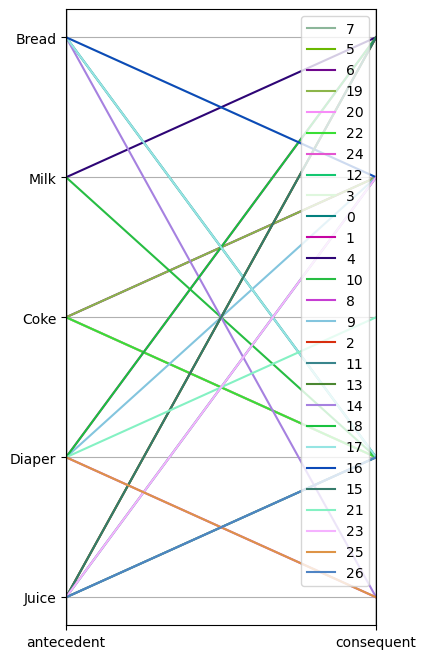

In [11]:
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]
coords = rules_to_coordinates(rules)
plt.figure(figsize=(4,8))
parallel_coordinates(coords,'rule')
plt.grid(True)
plt.show()

In [12]:
df = pd.read_csv('Groceries.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
transactions =  df.T.apply(lambda x: x.dropna().tolist()).tolist()
print(transactions[1:10])

[['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['pot plants'], ['whole milk', 'cereals']]


In [15]:
te = TransactionEncoder()
te_model = te.fit(transactions)
rows=te_model.transform(transactions)
df = pd.DataFrame(rows, columns=te_model.columns_)
print(df.shape)

(9835, 169)


In [16]:
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

       support                                           itemsets  length
0     0.008033                            (Instant food products)       1
1     0.033452                                         (UHT-milk)       1
2     0.017692                                    (baking powder)       1
3     0.052466                                             (beef)       1
4     0.033249                                          (berries)       1
...        ...                                                ...     ...
996   0.005186  (whipped/sour cream, whole milk, root vegetabl...       4
997   0.007829  (yogurt, whole milk, root vegetables, other ve...       4
998   0.007626  (yogurt, whole milk, tropical fruit, other veg...       4
999   0.005592  (whipped/sour cream, yogurt, whole milk, other...       4
1000  0.005694  (yogurt, whole milk, root vegetables, tropical...       4

[1001 rows x 3 columns]


In [18]:
rules = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.55)
rules = rules.sort_values(['confidence'], ascending =[False])
print(rules)

                                          antecedents         consequents  \
53          (yogurt, root vegetables, tropical fruit)        (whole milk)   
45     (pip fruit, root vegetables, other vegetables)        (whole milk)   
10                       (whipped/sour cream, butter)        (whole milk)   
35                    (whipped/sour cream, pip fruit)        (whole milk)   
11                                   (yogurt, butter)        (whole milk)   
8                           (butter, root vegetables)        (whole milk)   
18                             (tropical fruit, curd)        (whole milk)   
41        (whole milk, root vegetables, citrus fruit)  (other vegetables)   
46              (pip fruit, yogurt, other vegetables)        (whole milk)   
23                         (pip fruit, domestic eggs)        (whole milk)   
9                            (butter, tropical fruit)        (whole milk)   
21                         (margarine, domestic eggs)        (whole milk)   

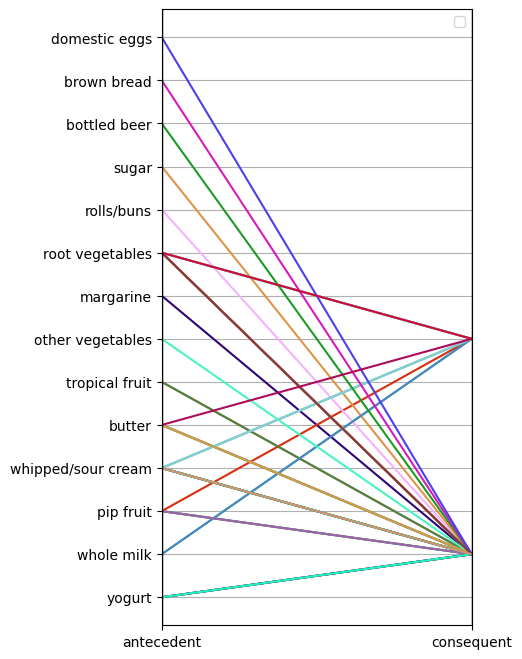

In [19]:
from pandas.plotting import parallel_coordinates
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]
coords = rules_to_coordinates(rules)
plt.figure(figsize=(4,8))
parallel_coordinates(coords,'rule')
plt.legend([])
plt.grid(True)
plt.show()